# Data description

#### Author's information
Author: Rahul Valiya Veettil
Supervisor: Eitan Rubin
contact email: rahul.epfl@gmail.com
University: Ben-Gurion University of the negev, Israel

#### Data
The script takes 1809 breast cancer patient samples obtained from the scientific paper  “Gyo¨rffy et. al, An online survival analysis tool to rapidly assess the effect of 22,277 genes on breast cancer prognosis using microarray data of 1,809 patients, Breast Cancer Research and Treatment, 2010.  (Link : https://www.ncbi.nlm.nih.gov/pubmed/20020197)

#### The exact location # of the data is at 
1. http://kmplot.com/analysis/studies/@MAS5_1000_1809_rounded_final.zip 
2. https://kmplot.com/analysis/studies/@expdesc_1809.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import data

In [4]:
# Import gene expression data
df = pd.read_csv('/media/user/Edison1/RahulGit/BRRP-GED/Data/input_data/@MAS5_1809_kerekitett_vegleges.txt', sep='\t')

# Import clinical data
clinical = pd.read_csv('/media/user/Edison1/RahulGit/BRRP-GED/Data/input_data/@expdesc_1809.txt', sep = '\t')

In [5]:
print(df.shape)
print(clinical.shape)

(22277, 1810)
(1809, 14)


In [6]:
df.iloc[:5, :5]

,AffyID,GSM107072,GSM107073,GSM107074,GSM107075
0,1007_s_at,4033,4905,6881,4782
1,1053_at,229,482,284,158
2,117_at,332,375,312,206
3,121_at,1669,2161,2513,1706
4,1255_g_at,99,103,191,73


# Boxplot of the top 10 columns

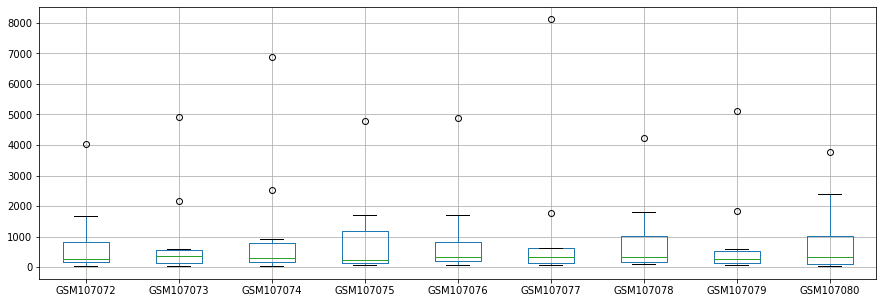

In [7]:
plt.figure(figsize = (15, 5))
df.iloc[:10, :10].boxplot()

# Count  of Relapse free information

In [8]:
clinical.head()

,AffyID,DataSet,RFS_event (1=relapse),RFS_time,Death_event (1=death),Death_time,DMFS_event (1=relapse),DMFS_time,ER status,Lymph node status,Death from BC,Grade,Size,Age
0,GSM107072,gse1456,1.0,"3,82",1.0,"4,14",NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN
1,GSM107073,gse1456,0.0,"8,15",0.0,"8,15",NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN
2,GSM107074,gse1456,0.0,"8,36",1.0,"2,22",NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN
3,GSM107075,gse1456,0.0,"8,23",0.0,"8,23",NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN
4,GSM107076,gse1456,0.0,"8,07",1.0,"5,55",NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [9]:
# Change the names to similar to PCM-sabre paper
clinical.rename(columns={'RFS_event (1=relapse)':'RFS_event',
                         'RFS_time':'RFS_time',
                         'Death_event (1=death)':'Death_event',
                         'Death_time':'Death_time',
                         'DMFS_event (1=relapse)':'DMFS_event',
                         'DMFS_time':'DMFS_time',
                         'ER status':'ER.status',
                         'Lymph node status':'Lymph.node.status',
                         'Age':'Age.x'}, inplace = True)

# drop unimportant columns for analysis
clinical.drop(columns = ['DataSet '], axis = 1, inplace = True)
clinical.drop(columns = ['Death from BC'], axis = 1, inplace = True)

# Count of relapse information
clinical['RFS_event'].value_counts()

0.0    903
1.0    689
Name: RFS_event, dtype: int64

# Funciton to calculate the missing value information

In [10]:
# Find columns with missing values
def missing_value_info(df, cut_off):
  """
  Function to find missing values in columns with the corresponding count  
  parameters
  ----
  df (pandas df): A pandas dataframe
  cut-off(integet): A cut-off value for the selection of features with least missing values
  
  prints
  ----
  Prints number of missing values in each column
  """
  
  print("Number of columns containing null values")
  print(len(df.columns[df.isna().any()]), end = "\n")
  print("-----------")
    
  print("Number of columns not containig null values")
  print(len(df.columns[df.notna().all()]), end = "\n")
  print("------------")
  
  print("Number of missing values in each column")
  print("---------")
  
  missing_values = {}
  no_missing_value_cols = []
  # loop through each column and calculate the missing value count in each column
  for col in df.columns:
    #print(col, "\t")
    if df[col].isna().any():      
      missing_values[col] = (df[col].isna().sum()/df.shape[0]) * 100      
      #print(missing_values[col])
    else:
      no_missing_value_cols.append(col)
      missing_values[col] = 0
      #print(missing_values[col])
      
  
  # create a dataframe of column names and corresponding missing value percentage
  missing_values = pd.DataFrame.from_dict(missing_values, orient = "index", columns = ['% of missing values'])
  # choose features based ona missing value percentage cut-off
  missing_values = missing_values[missing_values['% of missing values'] < cut_off]
  # get the names of the features selected after the missing value cut-off step
  #features_selected = missing_values.index.to_list()
  
  # create a seaborn bartplot of missing value feature names and corresponding missing value percentage
  sns.set(rc={'figure.figsize':(10,10)})
  sns.set(style = "whitegrid")
  sns.barplot(y = '% of missing values', 
              x = missing_values.index,
              data = missing_values,
              color = 'b')
  plt.xticks(rotation=90, size = 15)
  plt.yticks(size = 15)
  plt.tight_layout()  
  
  # append missing values columns with cut-off applied to the selected_list_features list
  #no_missing_value_cols.append(features_selected)
  #selected_list_features = [inner for outer in no_missing_value_cols for inner in outer]
  
  # return selected feature names
  return no_missing_value_cols #, features_selected
  

# Percentage of missing value count in clinilcal data

Number of columns containing null values
11
-----------
Number of columns not containig null values
1
------------
Number of missing values in each column
---------


['AffyID']

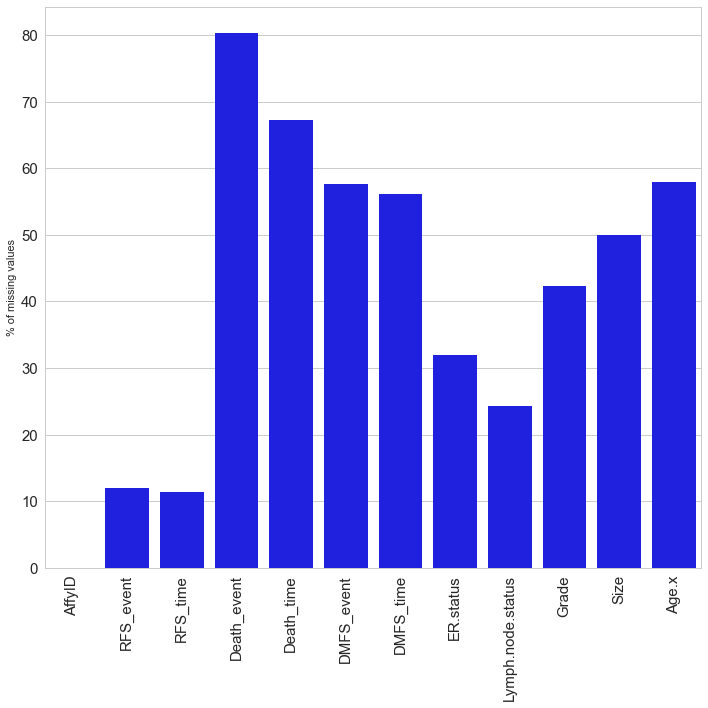

In [11]:
missing_value_info(clinical, cut_off = 100)

# The count of relapse events and distribution

Number of patients with RFS_event available 1592
The count of non-relapsed and relapsed patients
0.0    903
1.0    689
Name: RFS_event, dtype: int64


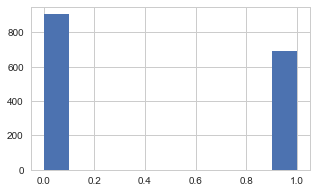

In [12]:
print('Number of patients with RFS_event available', sum(clinical['RFS_event'].value_counts()))

plt.figure(figsize = (5, 3))
clinical['RFS_event'].hist()
print('The count of non-relapsed and relapsed patients')
print(clinical['RFS_event'].value_counts())


In [13]:
# transform the dataframe to get patient in rows and probes in columns
df2 = df.transpose()

# Get the probe names
df2.columns =  df2.loc["AffyID"]

# Remove first row containing probe names
df2 = df2.iloc[1:]

# assign probe names as column name
df2.iloc[0:5, 0:5]

AffyID,1007_s_at,1053_at,117_at,121_at,1255_g_at
GSM107072,4033,229,332,1669,99
GSM107073,4905,482,375,2161,103
GSM107074,6881,284,312,2513,191
GSM107075,4782,158,206,1706,73
GSM107076,4898,255,422,1709,73


In [14]:
clinical.iloc[0:5, :]

,AffyID,RFS_event,RFS_time,Death_event,Death_time,DMFS_event,DMFS_time,ER.status,Lymph.node.status,Grade,Size,Age.x
0,GSM107072,1.0,"3,82",1.0,"4,14",NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,GSM107073,0.0,"8,15",0.0,"8,15",NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,GSM107074,0.0,"8,36",1.0,"2,22",NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,GSM107075,0.0,"8,23",0.0,"8,23",NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,GSM107076,0.0,"8,07",1.0,"5,55",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
clinical.set_index(keys = 'AffyID', drop = True, inplace = True)
clinical.head()

,RFS_event,RFS_time,Death_event,Death_time,DMFS_event,DMFS_time,ER.status,Lymph.node.status,Grade,Size,Age.x
AffyID,,,,,,,,,,,
GSM107072,1.0,"3,82",1.0,"4,14",NaN,NaN,NaN,NaN,2.0,NaN,NaN
GSM107073,0.0,"8,15",0.0,"8,15",NaN,NaN,NaN,NaN,3.0,NaN,NaN
GSM107074,0.0,"8,36",1.0,"2,22",NaN,NaN,NaN,NaN,1.0,NaN,NaN
GSM107075,0.0,"8,23",0.0,"8,23",NaN,NaN,NaN,NaN,2.0,NaN,NaN
GSM107076,0.0,"8,07",1.0,"5,55",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
MAS5_1809_merged = pd.merge(df2, clinical, left_index = True, right_index = True)
#MAS5_1809_merged = df2.reset_index().merge(clinical, on='AffyID').set_index('index')

In [17]:
print(MAS5_1809_merged.shape)
print(df2.shape)
print(clinical.shape)
print(clinical.shape[1]  + df2.shape[1])

(1809, 22288)
(1809, 22277)
(1809, 11)
22288


# How to get to the final dataframe size

In [18]:
combined = pd.read_csv("/media/user/Edison1/GeneRank_Ruth/Data-Noa-GeneBased/OriginalData and clinical/CombinedExpression.csv")


In [19]:
combined.head(5)

,Patient,ER.status,Lymph.node.status,Grade,Size,Age.x,X1007_s_at,X1053_at,X117_at,X121_at,...,X91826_at,X91920_at,X91952_at,Prediction,RFS_event,RFS_time,Death_event,Death_time,DMFS_event,DMFS_time
0,GSM107072,NaN,NaN,2.0,NaN,NaN,4033,229,332,1669,...,600,489,356,HIGH,1,3,82.0,1.0,4.0,14.0
1,GSM107073,NaN,NaN,3.0,NaN,NaN,4905,482,375,2161,...,620,606,330,LOW,0,8,15.0,0.0,8.0,15.0
2,GSM107074,NaN,NaN,1.0,NaN,NaN,6881,284,312,2513,...,733,1263,400,LOW,0,8,36.0,1.0,2.0,22.0
3,GSM107075,NaN,NaN,2.0,NaN,NaN,4782,158,206,1706,...,736,724,352,LOW,0,8,23.0,0.0,8.0,23.0
4,GSM107076,NaN,NaN,NaN,NaN,NaN,4898,255,422,1709,...,606,809,408,LOW,0,8,7.0,1.0,5.0,55.0


In [21]:
combined.shape[1] - 13 # where 13 is clinical data and patient ID

22215

In [22]:
# Get noa's cols and original data cols
noa_col = combined.columns
original_col = MAS5_1809_merged.columns

In [23]:
# Since there are X charaters in noa's cols remove it
noa_col_probes = [word[1:] for word in noa_col.tolist() if word.startswith('X')]

In [24]:
print(len(noa_col))
print(len(noa_col_probes))
print(len(original_col))

22228
22215
22288


In [25]:
# Additional columns 
for word in noa_col.tolist(): 
    if word.startswith('X'):
        pass
    else:
        print(word)

Patient
ER.status
Lymph.node.status
Grade
Size
Age.x
Prediction
RFS_event
RFS_time
Death_event
Death_time
DMFS_event
DMFS_time


In [26]:
s = set(noa_col_probes)
temp3 = [x for x in original_col if x not in s]
print(temp3)
print(len(temp3))

['AFFX-BioB-3_at', 'AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioC-3_at', 'AFFX-BioC-5_at', 'AFFX-BioDn-3_at', 'AFFX-BioDn-5_at', 'AFFX-CreX-3_at', 'AFFX-CreX-5_at', 'AFFX-DapX-3_at', 'AFFX-DapX-5_at', 'AFFX-DapX-M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-hum_alu_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMISGF3A/M97935_5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-LysX-3_at', 'AFFX-LysX-5_at', 'AFFX-LysX-M_at', 'AFFX-M27830_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-PheX-3_at', 'AFFX-PheX-5_at', 'AFFX-PheX-M_at', 'AFFX-r2-Bs-dap-3_at', 'AFFX-r2-Bs-dap-5_at', 'AFFX-r2-Bs-dap-M_at', 'AFFX-r2-Bs-lys-3_at', 'AFFX-r2-Bs-lys-5_at', 'AFFX-r2-Bs-lys-M_at', 'AFFX-r2-Bs-phe-3_at', 'AFFX-r2-Bs-phe-5_at', 'AFFX-r2-Bs-phe-M_at', 'AFFX-r2-Bs-thr-

In [28]:
# There are 22277 genes expression in the original data but noa only has 22215
# I see 73 - 11 = 62 genes are not present in noa data and they are baseline genes used by the platform
# If I delete this 62 genes from my data along with all clinical data then I get to 22215
MAS5_1809_merged.shape[1] - 73

22215

# Remove probe IDs that starts with AFFX that couldn't be mapped

In [29]:
selected_col = [col for col in original_col if not col.startswith('AFFX')]
selected_col = selected_col 
len(selected_col)

22226

In [30]:
22226-11

22215

In [32]:
del df
del df2
del combined

In [33]:
MAS5_1809_merged2 = MAS5_1809_merged[selected_col]

In [34]:
MAS5_1809_merged2.shape

(1809, 22226)

In [37]:
MAS5_1809_merged2.iloc[0:5, 22215:22226]

,RFS_event,RFS_time,Death_event,Death_time,DMFS_event,DMFS_time,ER.status,Lymph.node.status,Grade,Size,Age.x
GSM107072,1.0,"3,82",1.0,"4,14",NaN,NaN,NaN,NaN,2.0,NaN,NaN
GSM107073,0.0,"8,15",0.0,"8,15",NaN,NaN,NaN,NaN,3.0,NaN,NaN
GSM107074,0.0,"8,36",1.0,"2,22",NaN,NaN,NaN,NaN,1.0,NaN,NaN
GSM107075,0.0,"8,23",0.0,"8,23",NaN,NaN,NaN,NaN,2.0,NaN,NaN
GSM107076,0.0,"8,07",1.0,"5,55",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
MAS5_1809_merged_final = MAS5_1809_merged2.transpose()

In [39]:
MAS5_1809_merged_final.shape

(22226, 1809)

In [40]:
MAS5_1809_merged_final.iloc[0:5, 1800:1809]

,GSM232262,GSM232263,GSM232264,GSM232265,GSM232266,GSM232267,GSM232268,GSM232269,GSM232270
1007_s_at,3550,9866,4094,3369,5054,4614,5287,4326,2512
1053_at,416,390,346,794,503,389,709,761,504
117_at,201,234,190,209,78,83,272,108,117
121_at,635,726,615,429,600,414,658,648,394
1255_g_at,5,54,8,5,6,30,25,114,14


# Save merged dataframe

In [41]:
MAS5_1809_merged2.to_csv('/media/user/Edison1/RahulGit/BRRP-GED/Data/input_data/@MAS5_1809_merged.csv')

MAS5_1809_merged_final.to_csv('/media/user/Edison1/RahulGit/BRRP-GED/Data/input_data/@MAS5_1809_merged_final.csv')